In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [8]:
from sklearn.datasets import make_moons

from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve

## 0.Data

In [9]:
X, y = make_moons(n_samples = 1000) 

In [10]:
print("X has shapes: %s, y has shape: %s" % (X.shape, y.shape))

X has shapes: (1000, 2), y has shape: (1000,)


## 1. Decision Tree Classifier

#### Decision Tree Classifier (find best max_depth param, using CV on X_train )

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
print("Train feature set shape: %s, Test feature set shape: %s " % (X_train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (800, 2), Test feature set shape: (200, 2) 
Train set labels shape: (800,), Test set labels shape: (200,) 


In [13]:
max_depth_param_list = np.arange(2, 22)
score_results_dt = []
size = y_test.shape[0]

for depth in max_depth_param_list:
    model_dt = tree.DecisionTreeClassifier(max_depth = depth)
    kfold = KFold(n_splits=10)
    score = cross_val_score(model_dt, X_train, y_train, cv = kfold, scoring = "accuracy")
    score_results_dt.append(score)
    print("max_depth: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth: 2, CV Score Avg: 0.9087500000000001 
max_depth: 3, CV Score Avg: 0.9087500000000001 
max_depth: 4, CV Score Avg: 0.9012500000000001 
max_depth: 5, CV Score Avg: 0.9950000000000001 
max_depth: 6, CV Score Avg: 0.9950000000000001 
max_depth: 7, CV Score Avg: 0.9950000000000001 
max_depth: 8, CV Score Avg: 0.9950000000000001 
max_depth: 9, CV Score Avg: 0.9950000000000001 
max_depth: 10, CV Score Avg: 0.9950000000000001 
max_depth: 11, CV Score Avg: 0.9950000000000001 
max_depth: 12, CV Score Avg: 0.9950000000000001 
max_depth: 13, CV Score Avg: 0.9950000000000001 
max_depth: 14, CV Score Avg: 0.9950000000000001 
max_depth: 15, CV Score Avg: 0.9950000000000001 
max_depth: 16, CV Score Avg: 0.9950000000000001 
max_depth: 17, CV Score Avg: 0.9950000000000001 
max_depth: 18, CV Score Avg: 0.9950000000000001 
max_depth: 19, CV Score Avg: 0.9950000000000001 
max_depth: 20, CV Score Avg: 0.9950000000000001 
max_depth: 21, CV Score Avg: 0.9950000000000001 


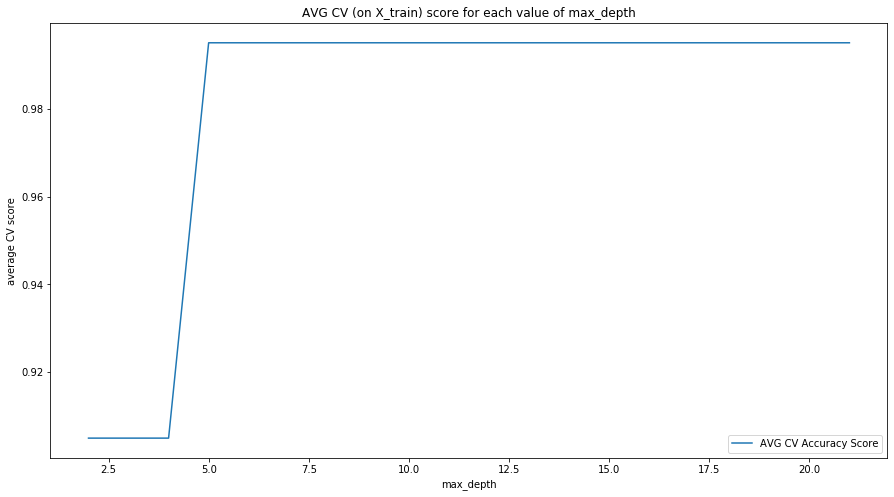

In [9]:
plt.figure(figsize = (15,8)) 
plt.plot(max_depth_param_list, np.mean(np.array(score_results_dt), axis = 1), label = "AVG CV Accuracy Score")

plt.title("AVG CV (on X_train) score for each value of max_depth")
plt.xlabel("max_depth")
plt.ylabel("average CV score")

plt.legend()
plt.show()

In [10]:
avg_cv_scores = np.mean(np.array(score_results_dt), axis = 1)
max_avg_accuracy_index = np.argmax(avg_cv_scores) 
print("Best Value for max_depth: %s" % max_depth_param_list[max_avg_accuracy_index])

Best Value for max_depth: 5


In [11]:
mod_dt_optimal = tree.DecisionTreeClassifier(max_depth = 3)
mod_dt_optimal_fit = mod_dt_optimal.fit(X_train,y_train)

print("Model Score on X_train %s" % round(mod_dt_optimal.score(X_train,y_train), 3))
print("Model Score on X_test %s" % round(mod_dt_optimal.score(X_test,y_test), 3))

Model Score on X_train 0.922
Model Score on X_test 0.89


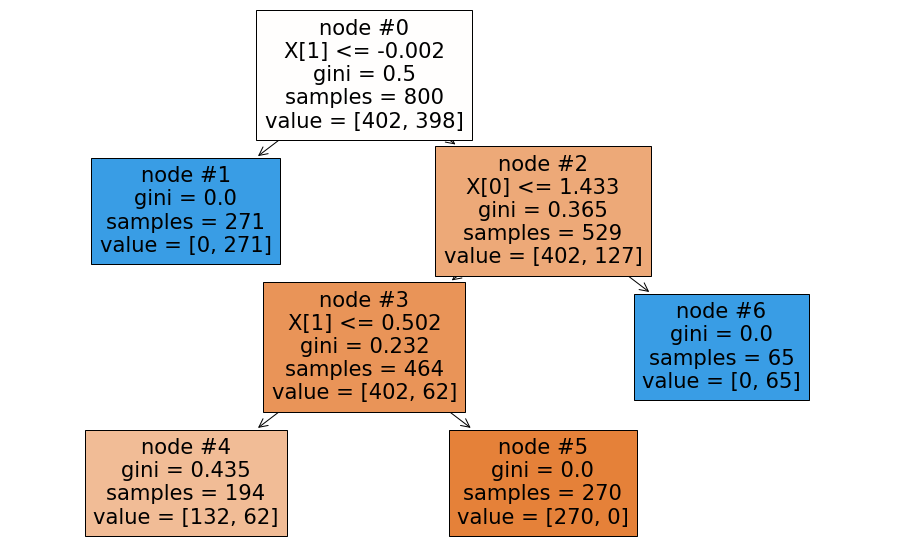

In [12]:
plt.figure(figsize = (16,10))
tree.plot_tree(mod_dt_optimal, filled = True, node_ids = True)
plt.show()

In [13]:
y_predict_train = mod_dt_optimal.predict(X_train)
pred_prob_dt_train = mod_dt_optimal.predict_proba(X_train)

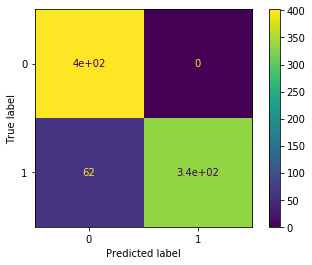

In [14]:
plot_confusion_matrix(mod_dt_optimal, X_train, y_train, display_labels = np.array([0,1]))
plt.show()

In [15]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       402
           1       1.00      0.84      0.92       398

    accuracy                           0.92       800
   macro avg       0.93      0.92      0.92       800
weighted avg       0.93      0.92      0.92       800



In [16]:
y_predict_test = mod_dt_optimal.predict(X_test)
pred_prob_dt_test = mod_dt_optimal.predict_proba(X_test)

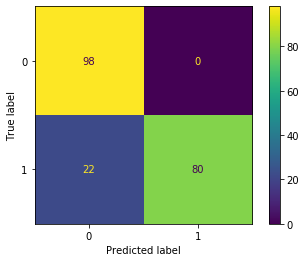

In [17]:
plot_confusion_matrix(mod_dt_optimal, X_test, y_test, display_labels = np.array([0,1]))
plt.show()

In [18]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        98
           1       1.00      0.78      0.88       102

    accuracy                           0.89       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.91      0.89      0.89       200



In [19]:
fpr0_test, tpr0_test, thresholds0_test = roc_curve(y_test, pred_prob_dt_test[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_test, tpr0_test))

fpr1_test, tpr1_test, thresholds1_test = roc_curve(y_test, pred_prob_dt_test[:,1], pos_label = 1) 
print("ROC: AUC Class 1: ", auc(fpr1_test, tpr1_test))

p0_test, r0_test, thresholds0_test = precision_recall_curve(y_test, pred_prob_dt_test[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 0:", auc(r0_test, p0_test))

p1_test, r1_test, thresholds1_test = precision_recall_curve(y_test, pred_prob_dt_test[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_test, p1_test))


ROC: AUC Class 0:  0.9603841536614646
ROC: AUC Class 1:  0.9603841536614646
Precision-Recall: AUC Class 0: 0.9663265306122448
Precision-Recall: AUC Class 1: 0.9718670076726342


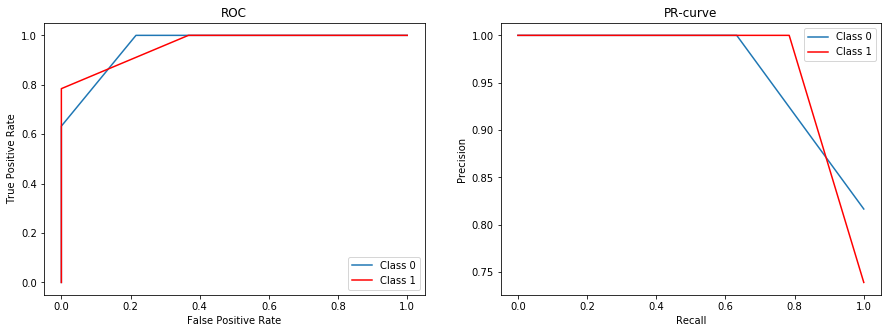

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_test, tpr0_test, "-", label = "Class 0")
plt.plot(fpr1_test, tpr1_test, "-", color = 'r', label = "Class 1")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_test, p0_test, "-", label = "Class 0")
plt.plot(r1_test, p1_test, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")

plt.show()

***